In [1]:
import pandas as pd
import oracledb

In [2]:

dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user="ora_msan99", password="a85263259", dsn=dsn)

In [3]:

Province=[]
cur = connection.cursor()
for row in cur.execute("select * from Province"):
    Province.append(row)

cur.close()
Industry=[]
cur = connection.cursor()
for row in cur.execute("select * from Industry"):
    Industry.append(row)

    
cur.close()

IndustryMapping=[]

cur = connection.cursor()
for row in cur.execute("select * from IndustryMapping"):
    IndustryMapping.append(row)
    
cur.close()
Emissions=[]
cur = connection.cursor()
for row in cur.execute("select * from Emissions"):
    Emissions.append(row)
    
cur.close()


In [4]:
Emissions = pd.DataFrame(Emissions,columns=['Geography','IndustryName', 'IOIC', 'Year',  'Emissions', 'IndustryID'])

IndustryMapping = pd.DataFrame(IndustryMapping,columns=['IndustryCode', 'IndustryName', 'NAICS', 'IOIC', 'Durable'])

Province = pd.DataFrame(Province,columns=['Geography', 'Year', 'Population'])

Industry = pd.DataFrame(Industry,columns=['Good_Type', 'Geography', 'Year','No_Employed'])

In [5]:
Emissions

,Geography,IndustryName,IOIC,Year,Emissions,IndustryID
0,Alberta,Households: Motor fuels and lubricants,9999999,2013,11184,99999
1,Alberta,Households: Motor fuels and lubricants,9999999,2014,11411,99999
2,Alberta,Households: Motor fuels and lubricants,9999999,2015,10480,99999
3,Alberta,Households: Motor fuels and lubricants,9999999,2016,10337,99999
4,Alberta,Households: Motor fuels and lubricants,9999999,2017,10835,99999
...,...,...,...,...,...,...
6155,Nunavut,Miscellaneous chemical product manufacturing,BS325C0,2018,1,325A
6156,Nunavut,Miscellaneous chemical product manufacturing,BS325C0,2019,1,325A
6157,Nunavut,Miscellaneous chemical product manufacturing,BS325C0,2020,1,325A
6158,Nunavut,Miscellaneous chemical product manufacturing,BS325C0,2021,1,325A


In [9]:
province_emissions.head()

,Geography,Emissions
0,Alberta,504718
1,British Columbia,382473
2,Canada,2725665
3,Manitoba,68960
4,New Brunswick,105153


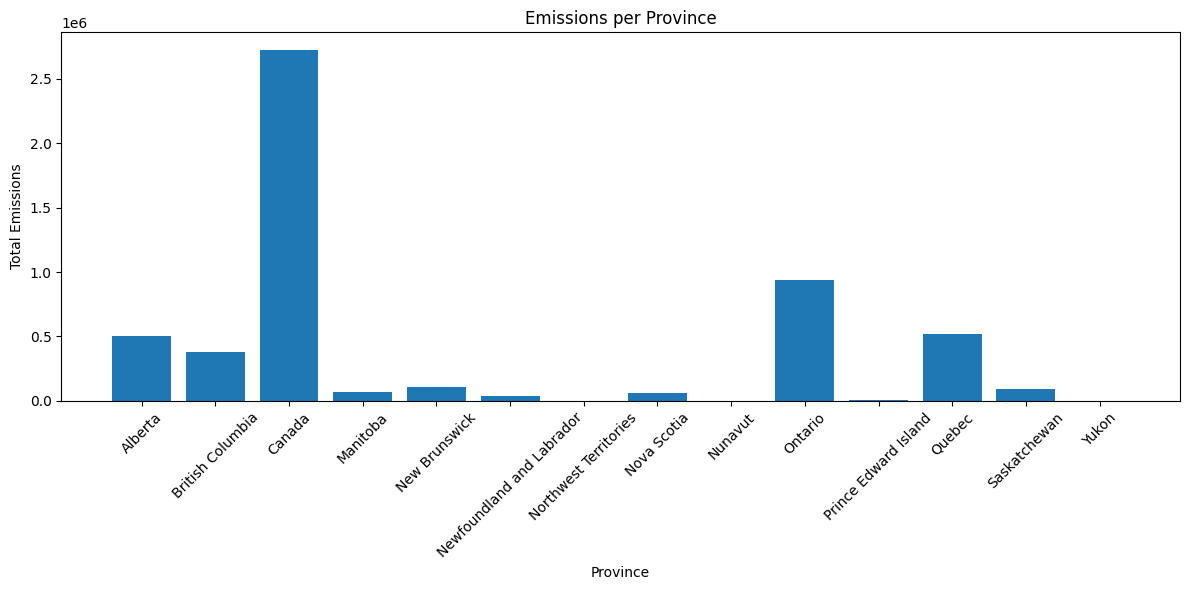

In [6]:
import matplotlib.pyplot as plt


merged_df = pd.merge(Emissions, Province, on=['Geography', 'Year'])

# Group by province and sum emissions
province_emissions = merged_df.groupby('Geography')['Emissions'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(province_emissions['Geography'], province_emissions['Emissions'])
plt.title('Emissions per Province')
plt.xlabel('Province')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:


merged_df = pd.merge(Emissions, Province, on=['Geography', 'Year'])

# Group by province and sum emissions
province_emissions_pc = merged_df.groupby('Geography')['Emissions','Population'].sum().reset_index()
province_emissions_pc['Emissions']=province_emissions_pc['Emissions']/province_emissions_pc['Population']


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(province_emissions_pc['Geography'], province_emissions_pc['Emissions'])
plt.title('Emissions per Province')
plt.xlabel('Province')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

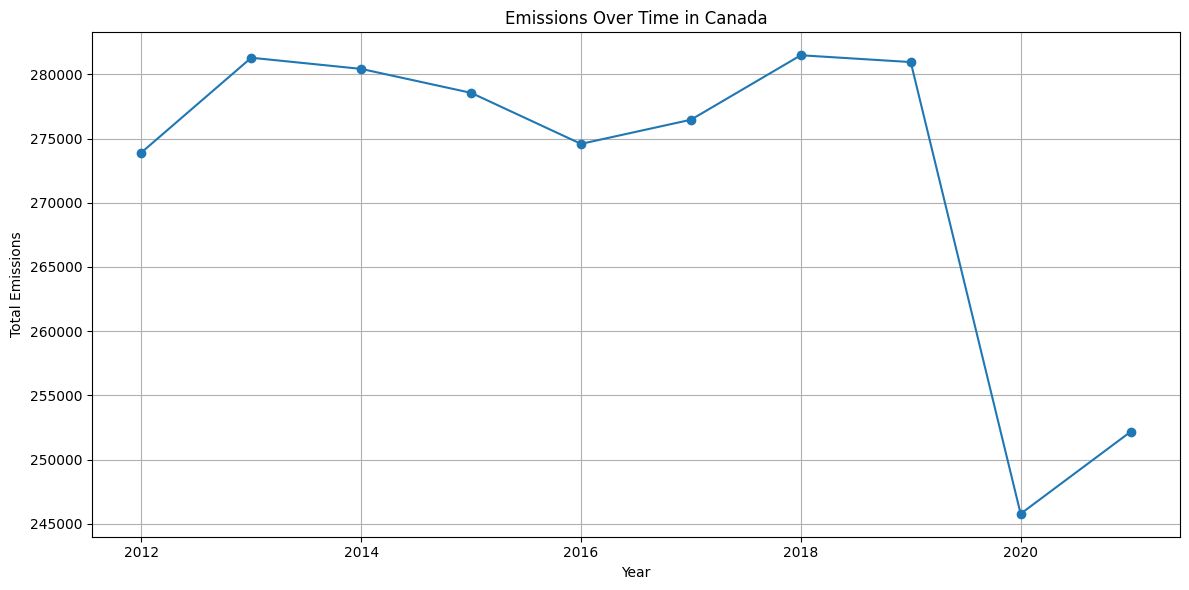

In [12]:

# Merge emissions and province data
merged_df = pd.merge(Emissions, Province, on=['Geography', 'Year'])

# Filter data for Canada
canada_emissions = merged_df[merged_df['Geography'] == 'Canada']

# Group by year and sum emissions for Canada
canada_emissions_over_time = canada_emissions.groupby('Year')['Emissions'].sum().reset_index()

# Plot emissions over time for Canada
plt.figure(figsize=(12, 6))
plt.plot(canada_emissions_over_time['Year'], canada_emissions_over_time['Emissions'], marker='o')
plt.title('Emissions Over Time in Canada')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


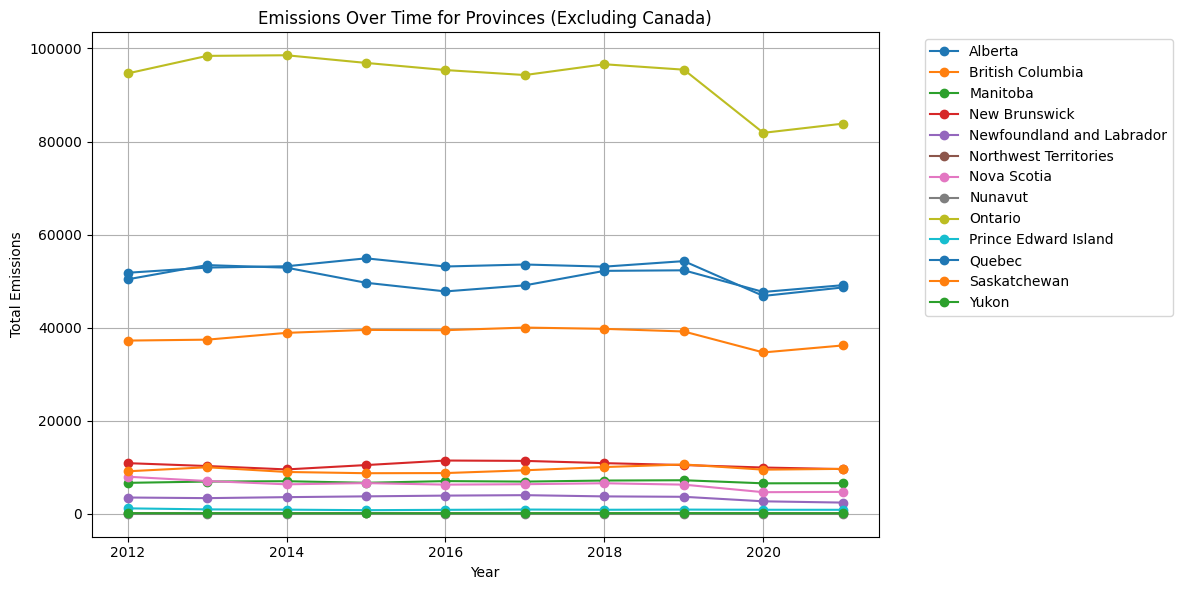

In [11]:
provinces_emissions = merged_df[merged_df['Geography'] != 'Canada']

# Group by province and year, sum emissions
provinces_emissions_over_time = provinces_emissions.groupby(['Geography', 'Year'])['Emissions'].sum().reset_index()

# Plot emissions over time for all provinces
plt.figure(figsize=(12, 6))
for province in provinces_emissions_over_time['Geography'].unique():
    province_data = provinces_emissions_over_time[provinces_emissions_over_time['Geography'] == province]
    plt.plot(province_data['Year'], province_data['Emissions'], marker='o', label=province)

plt.title('Emissions Over Time for Provinces (Excluding Canada)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
provinces_emissions = merged_df[merged_df['Geography'] != 'Canada']

# Group by province and year, sum emissions
provinces_emissions_over_time = provinces_emissions.groupby(['Geography', 'Year'])['Emissions','Population'].sum().reset_index()

provinces_emissions_over_time['Emissions']=provinces_emissions_over_time['Emissions']/provinces_emissions_over_time['Population']
plt.figure(figsize=(12, 6))
for province in provinces_emissions_over_time['Geography'].unique():
    province_data = provinces_emissions_over_time[provinces_emissions_over_time['Geography'] == province]
    plt.plot(province_data['Year'], province_data['Emissions'], marker='o', label=province)

plt.title('Emissions Over Time for Provinces (Excluding Canada)')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.